# Analysis on Gapminder data

In [2]:
#Required libraries
%matplotlib inline

import pandas
import numpy
import scipy.stats
import seaborn
import matplotlib.pyplot as plt

##Load data from the computer
data = pandas.read_csv('PythonExcercises/gapminder.csv', low_memory=False)

## Prepare and clean data

In [3]:
data['urbanrate'] = pandas.to_numeric(data['urbanrate'],errors='coerce')
data['incomeperperson'] = pandas.to_numeric(data['incomeperperson'],errors='coerce')
data['internetuserate'] = pandas.to_numeric(data['internetuserate'],errors='coerce')
data['incomeperperson']=data['incomeperperson'].replace(' ', numpy.nan)
data_clean=data.dropna()

## Let's see the correlation between urban rate and internet use rate

(0.62446400294897919, 4.54031629944612e-21)
Axes(0.125,0.125;0.775x0.775)


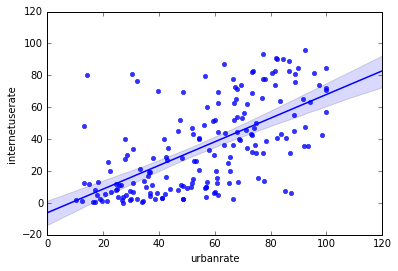

In [5]:
print (scipy.stats.pearsonr(data_clean['urbanrate'], data_clean['internetuserate']))
scat = seaborn.regplot(x="urbanrate", y="internetuserate", data=data_clean)
print(scat)

## The r value = 0.62 and p-value is very small negative value 

In [6]:
# A Function to classify persons by income to low, medium and high then count each group
import warnings
warnings.filterwarnings('ignore')
def incomegrp (row):
   if row['incomeperperson'] <= 744.239:
      return 1
   elif row['incomeperperson'] <= 9425.326 :
      return 2
   elif row['incomeperperson'] > 9425.326:
      return 3

data_clean['incomegrp'] = data_clean.apply (lambda row: incomegrp (row),axis=1)

chk1 = data_clean['incomegrp'].value_counts(sort=False, dropna=False)
print(chk1)

1    45
2    92
3    45
Name: incomegrp, dtype: int64


In [7]:
sub1=data_clean[(data_clean['incomegrp']== 1)]
sub2=data_clean[(data_clean['incomegrp']== 2)]
sub3=data_clean[(data_clean['incomegrp']== 3)]

In [8]:
print ('association between urbanrate and internetuserate for LOW income countries')
print (scipy.stats.pearsonr(sub1['urbanrate'], sub1['internetuserate']))
print ('       ')
print ('association between urbanrate and internetuserate for MIDDLE income countries')
print (scipy.stats.pearsonr(sub2['urbanrate'], sub2['internetuserate']))
print ('       ')
print ('association between urbanrate and internetuserate for HIGH income countries')
print (scipy.stats.pearsonr(sub3['urbanrate'], sub3['internetuserate']))

association between urbanrate and internetuserate for LOW income countries
(0.11557832532121717, 0.4496226297222905)
       
association between urbanrate and internetuserate for MIDDLE income countries
(0.32903330680479848, 0.0013624300920115247)
       
association between urbanrate and internetuserate for HIGH income countries
(0.089473773632878936, 0.55888890553585524)


## Insight to highlight here is the association between urban rate and internet use rate for Middle income countries

### Let's Visualize our results

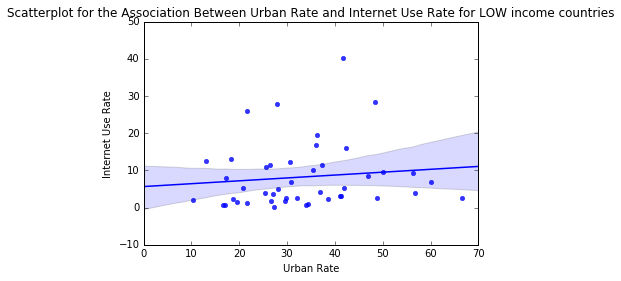

Axes(0.125,0.125;0.775x0.775)


In [9]:
scat1 = seaborn.regplot(x="urbanrate", y="internetuserate", data=sub1)
plt.xlabel('Urban Rate')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot for the Association Between Urban Rate and Internet Use Rate for LOW income countries')
plt.show()
print (scat1)

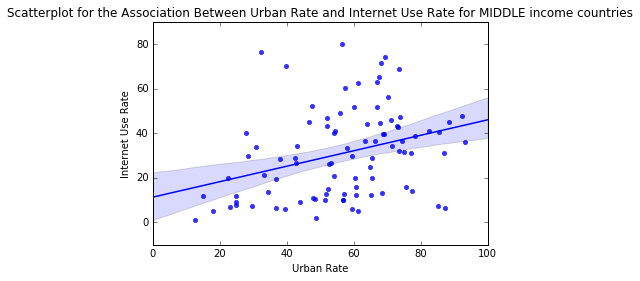

Axes(0.125,0.125;0.775x0.775)


In [10]:
scat2 = seaborn.regplot(x="urbanrate", y="internetuserate", data=sub2)
plt.xlabel('Urban Rate')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot for the Association Between Urban Rate and Internet Use Rate for MIDDLE income countries')
plt.show()
print (scat2)

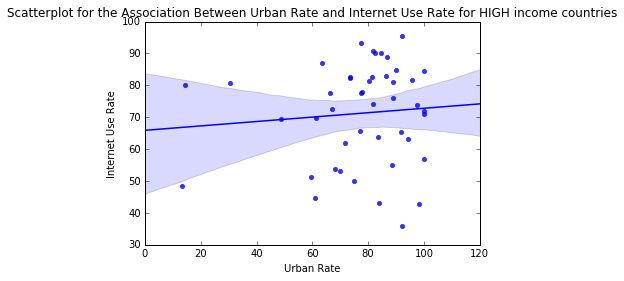

Axes(0.125,0.125;0.775x0.775)


In [11]:
scat3 = seaborn.regplot(x="urbanrate", y="internetuserate", data=sub3)
plt.xlabel('Urban Rate')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot for the Association Between Urban Rate and Internet Use Rate for HIGH income countries')
plt.show()
print (scat3)

# Visualization verfies our results from correlation coefficient. So, the insight here is the association between urban rate and internet use rate for middle income level countries 